# Complejidad, Caos y Fractales con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](https://relopezbriega.com.ar/) en [Matemáticas, Analisis de datos y Python](https://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Sistemas dinámicos, complejidad y caos" title="Sistemas dinámicos, complejidad y caos" src="https://relopezbriega.github.io/images/ComplexPy.jpg" width="80%" height="80%">

> "El científico no estudia la naturaleza por la utilidad que le pueda reportar; la estudia por el gozo que le proporciona, y este gozo se debe a la belleza que hay en ella..."

**[Henri Poincaré](https://es.wikipedia.org/wiki/Henri_Poincar%C3%A9)**

> "Las nubes no son esferas, las montañas no son conos, las líneas costeras no son círculos, y la corteza no es lisa ni los rayos viajan en línea recta..."

**[Benoît Mandelbrot](https://es.wikipedia.org/wiki/Beno%C3%AEt_Mandelbrot)**

## Introducción

Vivimos en un mundo tan bello como complejo. El enfoque tradicional de la ciencia,que busca generalmente reducir a los sistemas complejos en cada una de sus partes, comprender cada parte, y luego entender todo el sistema, parece no ser suficiente. Cuando las partes comienzan a conectarse e interactuar entre sí, las bases científicas de este enfoque comienzan a fallar, y se torna casi imposible predecir el comportamiento del sistema. Los simples supuestos como la *[linealidad](https://es.wikipedia.org/wiki/Lineal#Sistemas_lineales)*, la *<a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independencia</a>*, o la *[distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal)* parecen no ser de mucha de utilidad a la hora de modelar los fenómenos incluso más sencillos del mundo que nos rodea. Es a partir de esta realidad, que nuevos enfoques se comenzaron a desarrollar y surgieron nuevos campos de estudio multidisciplinarios como la [complejidad](https://es.wikipedia.org/wiki/Complejidad), o la [teoría del caos](https://es.wikipedia.org/wiki/Teor%C3%ADa_del_caos).   


## ¿Qué es un sistema complejo?

Es difícil definir rigurosamente que es un [Sistema complejo](https://es.wikipedia.org/wiki/Sistema_complejo), podemos decir que es un campo de investigación interdisciplinario que busca explicar cómo un gran número de entidades relativamente simples (las cuales generalmente se denominan *agentes*) se organizan, sin el beneficio de ningún controlador central, en un todo colectivo que crea patrones, usa información y, en algunos casos, evoluciona y aprende. Es el caso típico en que ***el todo es mucho más que la suma de sus partes***. Aunque no existe una buena definición de que es un  [Sistema complejo](https://es.wikipedia.org/wiki/Sistema_complejo), si podemos describir algunas de las características principales que poseen estos sistemas, como ser:

* **El sistema contiene una colección de muchos *agentes* que interactúan.** Las interacciones entre estos *agentes* pueden surgir porque están físicamente cerca el uno del otro, o porque son miembros de algún tipo de grupo, o porque comparten alguna información común. En la medida en que los *agentes* están vinculados entre sí a través de sus interacciones, también se puede pensar que forman parte de una [red o grafo](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_grafos). Por lo que el [análisis de redes](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_redes) es una herramienta importante para comprender estos sistemas. 

* **El comportamiento de estos *agentes* se ve afectado por una memoria o *[retroalimentación](https://es.wikipedia.org/wiki/Realimentaci%C3%B3n)*.** Esto significa que algo del pasado afecta algo en el presente, o que algo que sucede en un lugar afecta lo que está sucediendo en otro, en otras palabras, una especie de efecto de arrastre. El resultado neto de que todos tengan tal memoria puede ser que el sistema como un todo también recuerde. Por lo tanto, un *patrón o secuencia global* particular puede manifestarse en el sistema.

* **Los *agentes* pueden adaptar sus estrategias de acuerdo a su historia.** Esto simplemente significa que un *agente* puede adaptar su comportamiento por sí mismo, con la esperanza de mejorar su rendimiento.

* **El sistema es típicamente *abierto*.** Es decir, que el sistema puede ser influenciado por su entorno.

Así mismo, en el comportamiento característo de los [Sistemas complejos](https://es.wikipedia.org/wiki/Sistema_complejo), podemos observar los siguientes rasgos:

* **El sistema parece estar *vivo*.** El sistema evoluciona de una manera no trivial y, a menudo complicada, impulsada por una *[ecología](https://es.wikipedia.org/wiki/Ecolog%C3%ADa)* de *agentes* que interactúan y se adaptan bajo la influencia de la *retroalimentación*. 

* **El sistema exhibe fenómenos *emergentes* que generalmente son sorprendentes y pueden ser extremos.** En terminología científica, el sistema está lejos de alcanzar un *equilibrio*. Esto básicamente significa que cualquier cosa puede suceder, y si se espera lo suficiente, generalmente lo hará. Tales fenómenos generalmente son inesperados en términos de cuándo surgen, de ahí su aspecto de sorpresa. Pero el sistema también tenderá a exhibir fenómenos emergentes que a su vez son sorprendentes en el sentido de que no podrían haber sido predichos en base al conocimiento de las propiedades de los *agentes* individuales.

* **Los fenómenos emergentes suelen surgir en ausencia de cualquier tipo de *mano invisible* o controlador central.** En otras palabras, un [Sistema complejo](https://es.wikipedia.org/wiki/Sistema_complejo) puede evolucionar de una manera complicada por sí mismo. Por esta razón, a menudo se considera que los [Sistemas complejos](https://es.wikipedia.org/wiki/Sistema_complejo) son mucho más que la suma de sus partes. 

* **El sistema muestra una mezcla complicada de comportamiento ordenado y desordenado.** De manera más general, todos los [Sistemas complejos](https://es.wikipedia.org/wiki/Sistema_complejo) parecen poder moverse entre el *orden* y el *desorden* por su propia cuenta.


## ¿Qué es la teoría del caos?

La [teoría del caos](https://es.wikipedia.org/wiki/Teor%C3%ADa_del_caos) más que una teoría, es un *paradigma* que supuso en su momento una gran revolución científica, al reflejar que muchos sistemas que eran considerados [deterministas](https://es.wikipedia.org/wiki/Determinismo) y previsibles tenían severos límites en dicha previsibilidad. Es decir, que no eran tan útiles como se creía a la hora de predecir eventos futuros. Iniciada por [Henri Poincaré](https://es.wikipedia.org/wiki/Henri_Poincar%C3%A9) y popularizada gracias al trabajo del matemático y meteorólogo [Edward Lorenz](https://es.wikipedia.org/wiki/Edward_Lorenz), la [teoría del caos](https://es.wikipedia.org/wiki/Teor%C3%ADa_del_caos) se ha utilizado en campos como las matemáticas y la meteorología para explicar la inexactitud y la dificultad para obtener resultados previsibles de la realidad.

### El efecto mariposa 
Esta teoría es ampliamente conocida por lo que se denomina el ***efecto mariposa***, según el cual ***el débil golpe de las alas de una mariposa puede ser la causa de un huracán a miles de kilómetros de distancia***. Se indica de este modo que la existencia de una variable concreta puede provocar o alterar otras, influyéndose progresivamente hasta obtener un resultado fuera de lo esperado. En síntesis, podemos considerar que la [teoría del caos](https://es.wikipedia.org/wiki/Teor%C3%ADa_del_caos) establece que pequeños cambios en las *condiciones iniciales* crean grandes diferencias respecto al resultado final, con lo que una gran mayoría de los sucesos y sistemas no resultan totalmente predecibles.

Es importante tener en cuenta que a pesar de las apariencias, el *caos* al que se refiere esta teoría no implica una falta de orden, sino que los hechos y la realidad no se ajustan a un [modelo lineal](https://es.wikipedia.org/wiki/Modelo_lineal). 


## El mapa logístico

## El extraño atractor de Lorenz

## Sistemas Adaptativos

## Fractales y la geometría de la naturaleza

### Escalar es una propiedad relacionada con la auto-similitud

## El juego del caos de Barnsly

In [1]:
# <!-- collapse=True -->
# Importando las librerías que vamos a utilizar
import pandas as pd
import numpy as np
from fractal import Fern, Sierpinski, Vicsek, Tree, Dragon, Koch, Hilbert, Levy

# graficos incrustados
%matplotlib inline

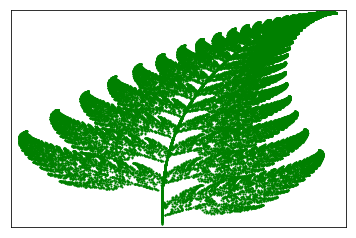

In [2]:
# Dibujar una hoja utilizando el juego del caos de Barnsley
fern = Fern()
fern.plot()

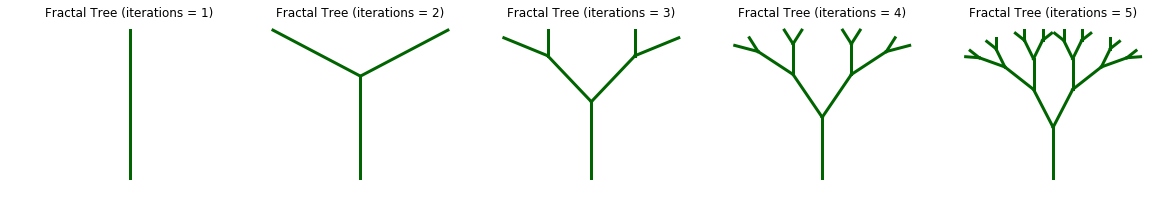

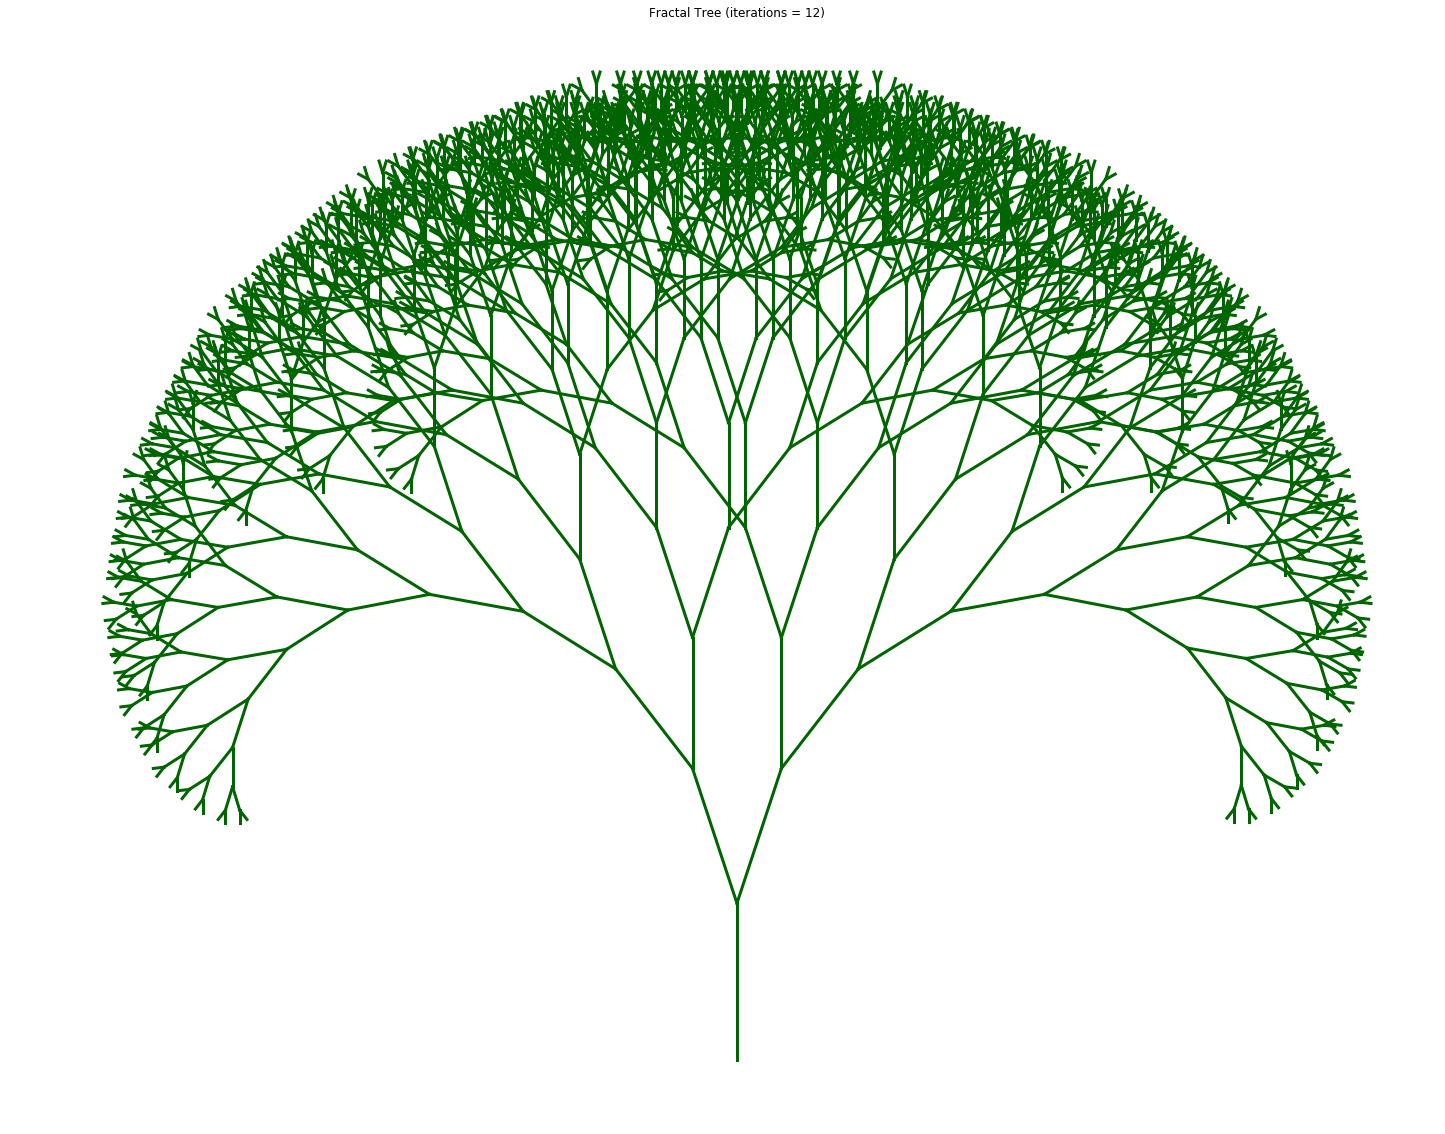

In [3]:
tree = Tree()
tree.plot()

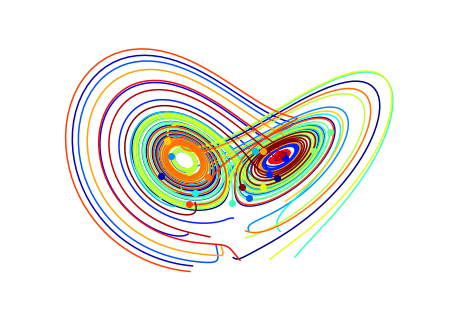

In [3]:
# <!-- collapse=True -->
N_trajectories = 20

def lorentz_deriv(x_y_z, t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    (x, y, z) = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 4, 1000)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=30, blit=True)

# Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save('lorentz_attractor.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

plt.show()

In [1]:
# <!-- collapse=True -->
%%HTML
<video width="320" height="240" controls>
  <source src="https://relopezbriega.github.io/images/lorentz_attractor.mp4" type="video/mp4">
</video>

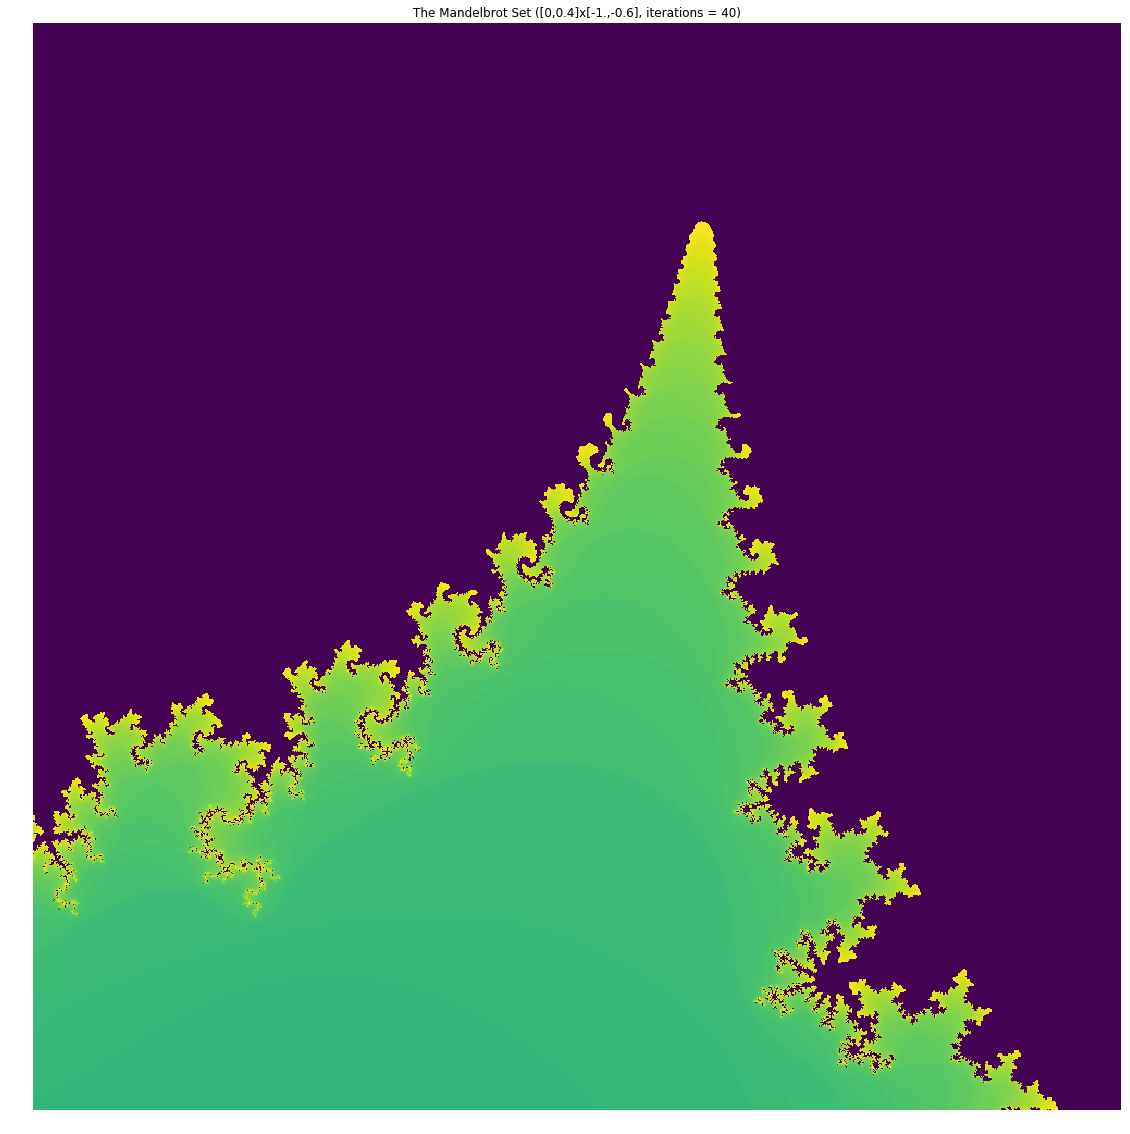

In [21]:
# <!-- collapse=True -->
def mandelbrot( h,w, maxit=40): #20
        '''
        Returns an image of the Mandelbrot fractal of size (h,w).
        '''
        y,x = ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
        #y,x = ogrid[ -0.25:0.25:h*1j, -1.8:-1.3:w*1j ]
        #y,x = ogrid[ -0.05:0.05:h*1j, -1.5:-1.4:w*1j ]
        c = x+y*1j
        z = c
        divtime = maxit + np.zeros(z.shape, dtype=int)
        for i in xrange(maxit):
                z  = z**2 + c
                diverge = z*conj(z) > 2**2            # who is diverging
                div_now = diverge & (divtime==maxit)  # who is diverging now
                divtime[div_now] = i  +100                # note when
                z[diverge] = 2                        # avoid diverging too much

        return divtime
def mandelbrot2( h,w,a=-2.,b=.8,c=-1.4,d=1.4, maxit=40): #20
        '''
        Returns an image of the Mandelbrot fractal of size (h,w).
        '''
        y,x = np.ogrid[ c:d:h*1j, a:b:w*1j ]
        # y,x = ogrid[ -0.25:0.25:h*1j, -1.8:-1.3:w*1j ]
        #y,x = ogrid[ -0.05:0.05:h*1j, -1.5:-1.4:w*1j ]
        c = x+y*1j
        z = c
        divtime = maxit + np.zeros(z.shape, dtype=int)
        for i in range(maxit):
                z  = z**2 + c
                diverge = z*np.conj(z) > 2**2            # who is diverging
                div_now = diverge & (divtime==maxit)  # who is diverging now
                divtime[div_now] = i  +100                # note when
                z[diverge] = 2                        # avoid diverging too much

        return divtime

#fig = plt.figure(figsize=(15,15))
plt.figure(figsize=(20,20))

#fig = plt.subplot(4,1,1)#,figsize=(20,20))

plt.imshow(mandelbrot2(1000,1000)) 
#s = "The Mandelbrot Set ([-2.0,0.8]x[-1.4,1.4], iterations = 40)"
#s = "The Mandelbrot Set ([-1.8,-1.3]x[-0.25,0.25], iterations = 40)"
s = "The Mandelbrot Set ([-1.5,-1.4]x[-0.05,0.05], iterations = 40)" 
#plt.subplot(4,1,1).
plt.title(s)
plt.axis('off')

##fig = plt.figure(figsize=(15,15))
##fig = plt.subplot(4,1,2)

# plt.figure(figsize=(20,20))

# plt.imshow(mandelbrot2(1000,1000,-1.8,-1.3,-.25,0.25)) 
# s = "The Mandelbrot Set ([-1.8,-1.3]x[-0.25,0.25], iterations = 40)"
# #plt.subplot(4,1,2).
# plt.title(s)
# plt.axis('off')

# plt.figure(figsize=(20,20))

# #fig = plt.figure(figsize=(15,15))
# #fig = plt.subplot(4,1,3)

# plt.imshow(mandelbrot2(1000,1000,-1.5,-1.4,-0.05,0.05)) 
# s = "The Mandelbrot Set ([-1.5,-1.4]x[-0.05,0.05], iterations = 40)"
# #plt.subplot(4,1,3).
# plt.title(s)
# plt.axis('off')

# plt.figure(figsize=(20,20))

#fig = plt.figure(figsize=(15,15))
#fig = plt.subplot(4,1,4)

plt.imshow(mandelbrot2(1000,1000,-1.,-.6,0.,0.4)) 
s = "The Mandelbrot Set ([0,0.4]x[-1.,-0.6], iterations = 40)"
#plt.subplot(4,1,4).
plt.title(s)
plt.axis('off')



plt.show()

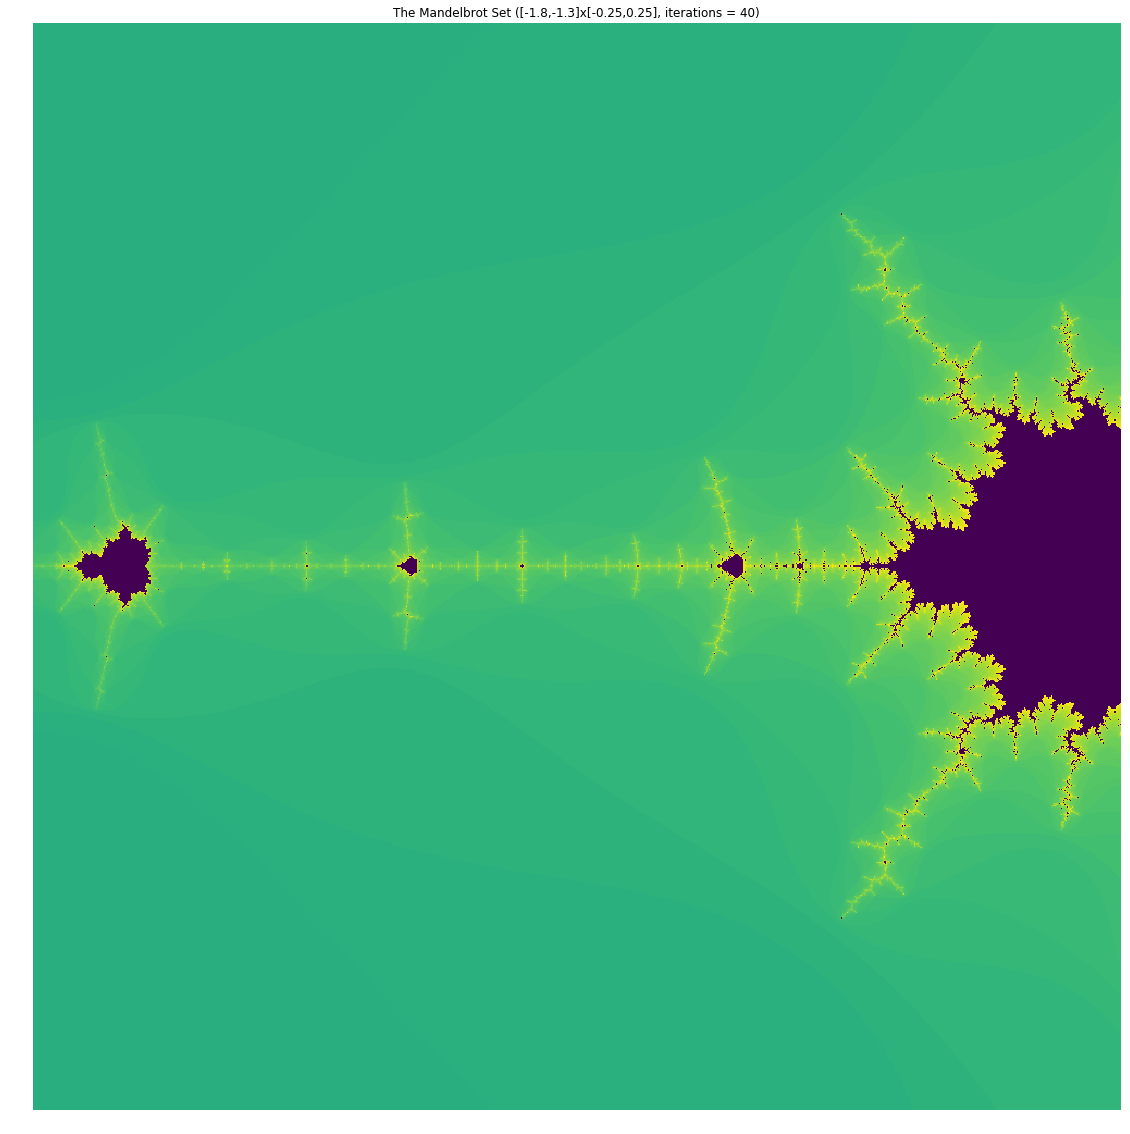

In [27]:
# <!-- collapse=True -->
plt.figure(figsize=(20,20))

plt.imshow(mandelbrot2(1000,1000,-1.8,-1.3,-.25,0.25)) 
s = "The Mandelbrot Set ([-1.8,-1.3]x[-0.25,0.25], iterations = 40)"
plt.title(s)
plt.axis('off')
plt.show()

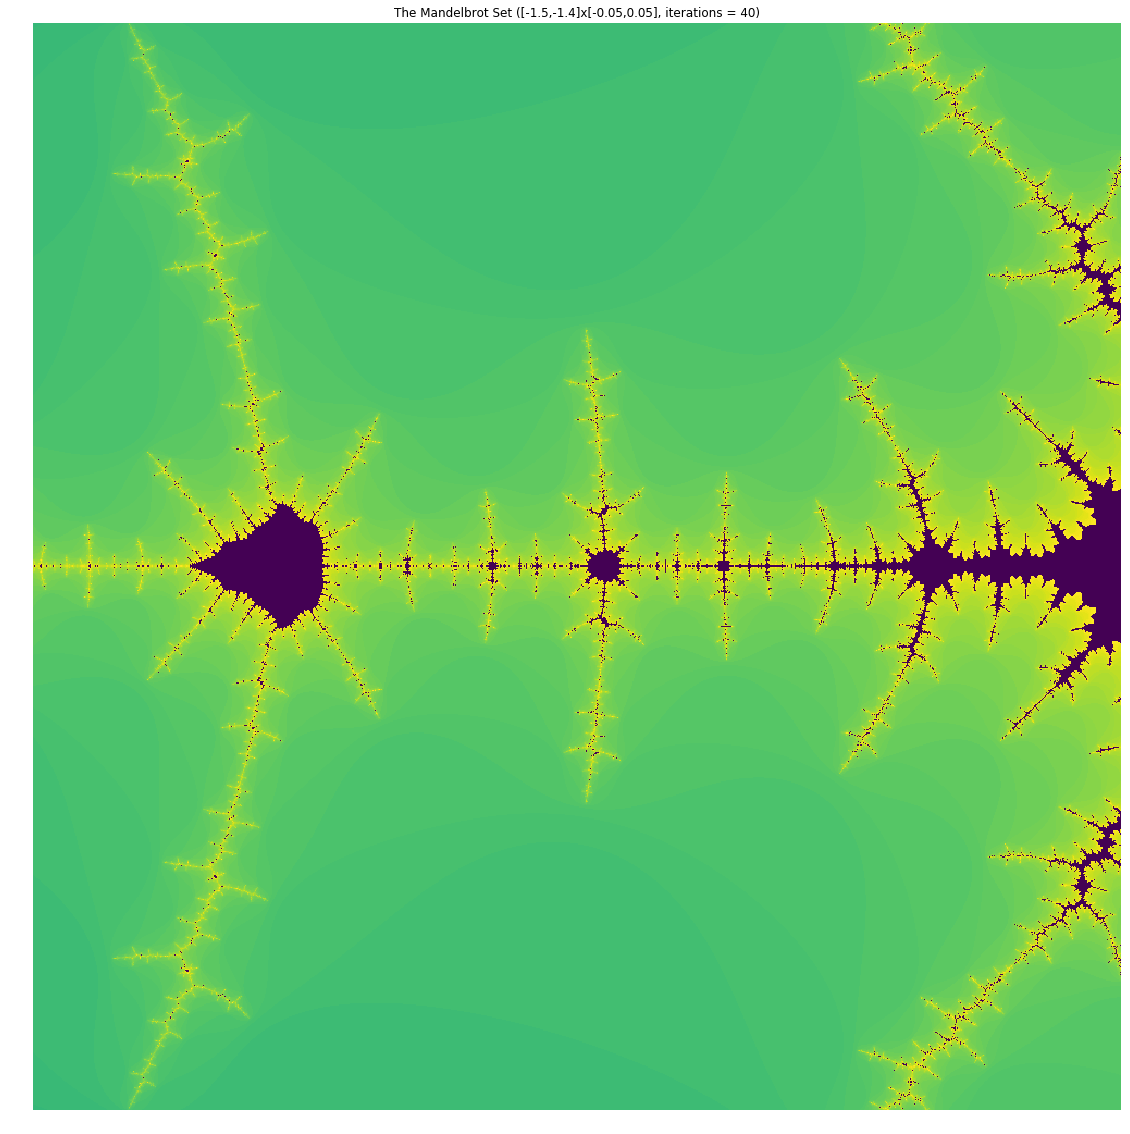

In [28]:
# <!-- collapse=True -->
plt.figure(figsize=(20,20))

plt.imshow(mandelbrot2(1000,1000,-1.5,-1.4,-0.05,0.05)) 
s = "The Mandelbrot Set ([-1.5,-1.4]x[-0.05,0.05], iterations = 40)"
plt.title(s)
plt.axis('off')
plt.show()

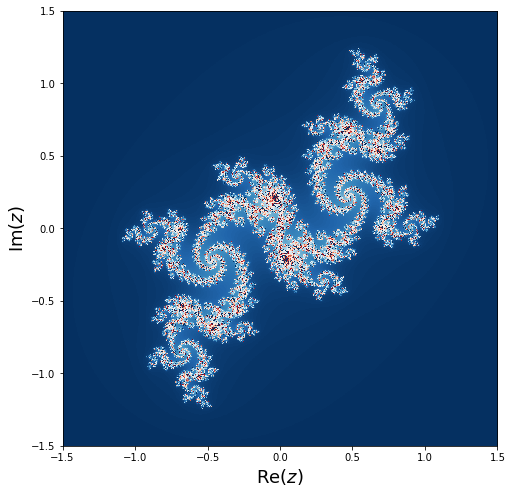

In [31]:
# <!-- collapse=True -->
# Graficando el fractal de Julia
def py_julia_fractal(z_re, z_im, j):
    '''Crea el grafico del fractal de Julia.'''
    for m in range(len(z_re)):
        for n in range(len(z_im)):
            z = z_re[m] + 1j * z_im[n]
            for t in range(256):
                z = z ** 2 - 0.05 + 0.68j
                if np.abs(z) > 2.0:
                    j[m, n] = t
                    break
                    
jit_julia_fractal = numba.jit(nopython=True)(py_julia_fractal)

N = 1024
j = np.zeros((N, N), np.int64)
z_real = np.linspace(-1.5, 1.5, N)
z_imag = np.linspace(-1.5, 1.5, N)
jit_julia_fractal(z_real, z_imag, j)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(j, cmap=plt.cm.RdBu_r, extent=[-1.5, 1.5, -1.5, 1.5])
ax.set_xlabel("$\mathrm{Re}(z)$", fontsize=18)
ax.set_ylabel("$\mathrm{Im}(z)$", fontsize=18)
plt.show()

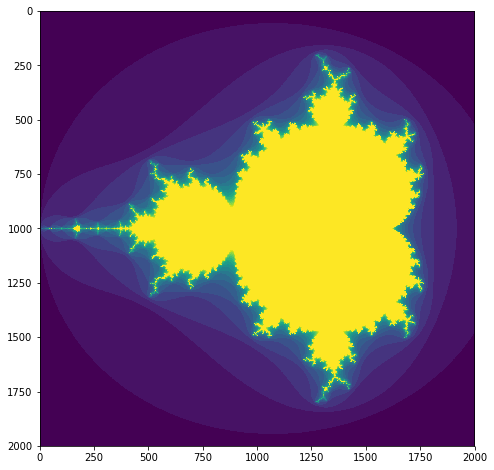

In [32]:
# <!-- collapse=True -->
# Graficando el conjunto de Mandelbrot 
def mandelbrot( h,w, maxit=20 ):
    '''Crea el grafico del fractal de Mandelbrot del tamaño (h,w).'''
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z  = z**2 + c
        diverge = z*np.conj(z) > 2**2         
        div_now = diverge & (divtime==maxit)  
        divtime[div_now] = i                  
        z[diverge] = 2                        
        
    return divtime

plt.figure(figsize=(8,8))
plt.imshow(mandelbrot(2000,2000))
plt.show()

Con esto llegamos al final del artículo. La ida central de las ciencias que estudian la naturaleza es hacer de lo maravilloso un lugar común! Mostrar que la [complejidad](https://es.wikipedia.org/wiki/Complejidad), vista correctamente, es sólo una máscara para lo simple!; y encontrar patrones escondidos en el aparente [caos](https://es.wikipedia.org/wiki/Teor%C3%ADa_del_caos)! 


Saludos!

*Este post fue escrito por [Raúl e. López Briega](https://relopezbriega.github.io/) utilizando [Jupyter notebook](https://jupyter.org/). Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/pyComplexity.ipynb) o ver su version estática en [nbviewer](https://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/pyComplexity.ipynb).*